# 5 Excellent Julia Features That Python Developers Can Only Wish They Had
## Continuation of Julia vs. Python debate
![](images/unsplash.jpg)
<figcaption style="text-align: center;">
    <strong>
        Photo by 
        <a href='https://unsplash.com/@harrson?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText'>Den Harsson</a>
    </strong>
</figcaption>

### Introduction

Yes, Python is more widely used. Yes, it has more libraries. Yes, I like Python better but these don't prove the core, native language is better than Julia. 

This is like the iOS vs. Android debate. Just because more devices run on Android (many uses cases for Python) and it has much more third-party integrations (Python libraries), it doesn't mean Android (Python) is actually better than iOS (bare-bones Julia).

In fact, there are so many iOS features that Android has admired for years despite its massive user base. In this article, we will look at a few such features of Julia that I am sure Python developers would love to have.

### 1. Speed

Julia users are so weirdly proud of the speed of their language - like a parent of their child. And, they are right in doing so. Julia is one of the fastest languages in history and in the [PetaFlop group](https://discourse.julialang.org/t/what-makes-a-language-reach-the-petaflop-mark/79963) along with C, C++ and Fortran. 

PetaFlops performance is way bigger than what Python can do. 

Now, most don't have a machine to reach PetaFlops, so we can only try a few basic things. Let's start with comparing Flux.jl and TensorFlow, which are cornerstone deep learning libraries in both language's respective ecosystems. 

We will use TensorFlow's `GradientTape` to differentiate a polynomial and measure the performance:

```python
import time

import tensorflow as tf
start = time.time()
x = tf.Variable(5.0)

with tf.GradientTape() as tape:
   y = 3 * x ** 3 + 4 * x ** 2 + 6 * x + 5

   # dy_dx = 9x^2 + 8x + 6
   dy_dx = tape.gradient(y, x)

print(time.time() - start)
```

```
[OUT]: 0.003016233444213867
```

The first run was actually over a second, so I rerun the code block to give TensorFlow a head start. Now, let's do the same in Julia:

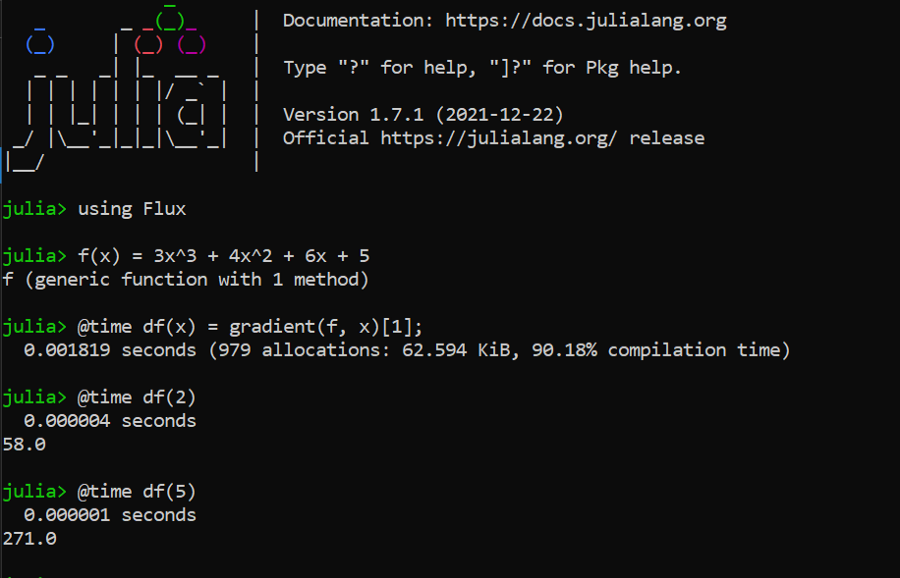

The first run takes ~0.002, already faster than TensorFlow's second run. The second run of Flux.jl is about 450 times faster! And it gets faster for other inputs as we run the code more times. 

If you think it is too narrow to compare deep learning libraries, let's try native Python and Julia code. We will benchmark a simple function that returns the *nth* number of the Fibonacci sequence; that'll be good enough.

In [1]:
import time

def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

I stupidly got into this comparison without knowing how much it would take Python to calculate the 100th number in Fibonacci sequence. Turns out, it takes too damn long. 

So, I tried the 40th number and it took about 21 seconds:

In [3]:
start = time.time()

print(fib(40))
print("Execution time in Python: ", time.time() - start)

102334155
Execution time in Python:  20.88260841369629


Keep in mind that I deliberately chose the slowest function to find the Fibonacci numbers so that we can see how the languages compare in the worst-case scenarios.

Now, let's try Julia.

In [1]:
using TimerOutputs

function fib(n)
    if n == 0
        return 0
    elseif n == 1
        return 1
    else
        return fib(n-1) + fib(n-2)
    end
end

@time fib(40)

  0.527796 seconds


102334155

Julia's version is around 40 times faster. This is like the twisted real-life version of the tortoise and the hare tale that ends with the hare always winning the race.

To be fair to Python, NumPy is actually faster than Julia for matrix manipulation but we have to keep in mind that most of NumPy is written in C. 

### 2. Interoperability

The inspiration for Julia comes from many languages as stated in [the Greed of Julia](https://julialang.org/blog/2012/02/why-we-created-julia/). This makes Julia great friends with other languages, as you can easily call C, Python, Fortran or R. This allows smooth integration of code and libraries between many languages. 

Since we don't care about the rest (including R), we will check out the `PyCall` package to run a Python library like Pandas:

In [1]:
using PyCall

# Create a random array
a = rand(1000)

# Import Pandas
pd = pyimport("pandas")

data = Dict("name" => ["Alice", "Bob", "Charlie"],
            "age" => [25, 30, 35],
            "city" => ["New York", "Los Angeles", "Chicago"])

# Create a dataframe
pd.DataFrame(data).head()

,name,city,age
0,Alice,New York,25
1,Bob,Los Angeles,30
2,Charlie,Chicago,35


The `pyimport` function loads a Python library into a variable. Then, we can use Julia syntax and objects inside Pandas functions and classes, like we used a Julia dictionary to create a DataFrame. 

The `pd` object can be used almost identically to Python (`.plot()` is not supported yet):

In [2]:
penguins = pd.read_csv("data/penguins.csv")

penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [3]:
penguins.groupby("island").count()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
island,,,,,,
Biscoe,168,167,167,167,167,163
Dream,124,124,124,124,124,123
Torgersen,52,51,51,51,51,47


### 3. Math support

One of Julia's main selling points is that it is geared towards scientific computing. This means it has excellent support for math and statistics. 

First of all, let's check out MATLAB-like syntax to writing polynomials:

In [5]:
x = 73

4x^2 - 8x + x

20805

In [6]:
(x + 1)x + 5x

5767

As you can see, you can drop the multiplication symbol when writing coefficients and variables. This makes the code so much more readable and easier to type.

Julia installation also comes with a whole suite of commonly-used math functions. Here is a list for powers, logarithms and roots:

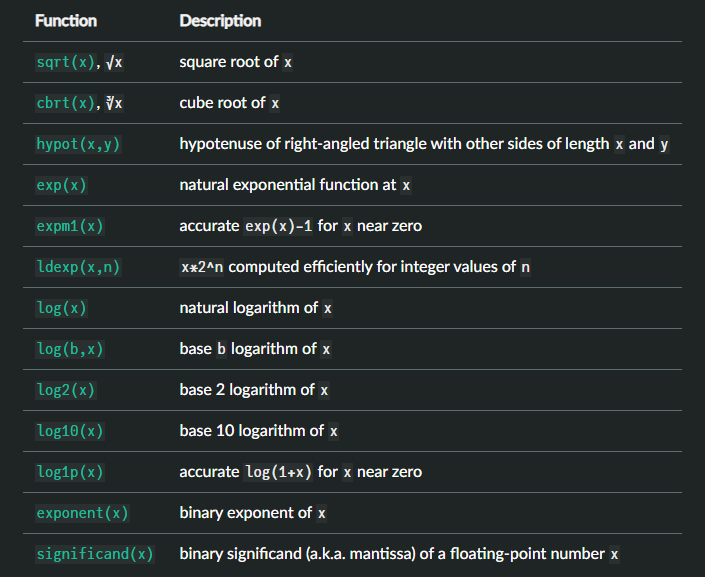

And about 30 trigonometry functions:

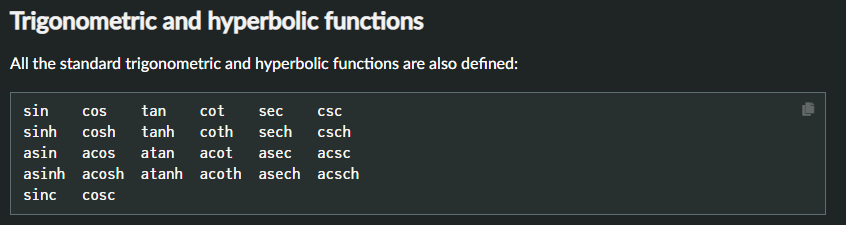

All these functions are directly available from the global scope - no imports are necessary. In Python, you would need the `math` module for basic math or install extra dependencies like `NumPy` or `SciPy`. 

I think it's embarrassing for a language that is acknowledged as the king of scientific computing not to support basic calculus and linear algebra natively, not to mention the lack of vectorization.

In Julia, vectorization is enabled for any array or matrix using any function, both native and user-defined:

In [7]:
array = [1, 2, 3]

array .^ 5

3-element Vector{Int64}:
   1
  32
 243

In [9]:
array .+ x

3-element Vector{Int64}:
 74
 75
 76

Simply adding a `.` (dot) before any function makes it vectorized (applies an operation to all array elements simultaneously rather than in a loop).

This is also possible for named functions; just add the dot before opening the brackets:

In [14]:
exp.(array)

3-element Vector{Float64}:
  2.718281828459045
  7.38905609893065
 20.085536923187668

In [15]:
log.(array)

3-element Vector{Float64}:
 0.0
 0.6931471805599453
 1.0986122886681098

### 4. Multiple dispatch

```julia
function add(x::Number, y::Number)
    return x + y
end

function add(x::String, y::String)
    return x * " " * y
end

# define methods for specific argument types
add(x::Number, y::Unitful.Quantity) = add(x, y.value)
add(x::Unitful.Quantity, y::Number) = add(x.value, y)
add(x::Unitful.Quantity, y::Unitful.Quantity) = add(x.value, y.value)

```

```julia
# usage of the function
julia> add(2, 3)
5
julia> add("hello", "world")
"hello world"
julia> add(2u"m", 3u"cm")
2.03m
```

### 5. On the command-line

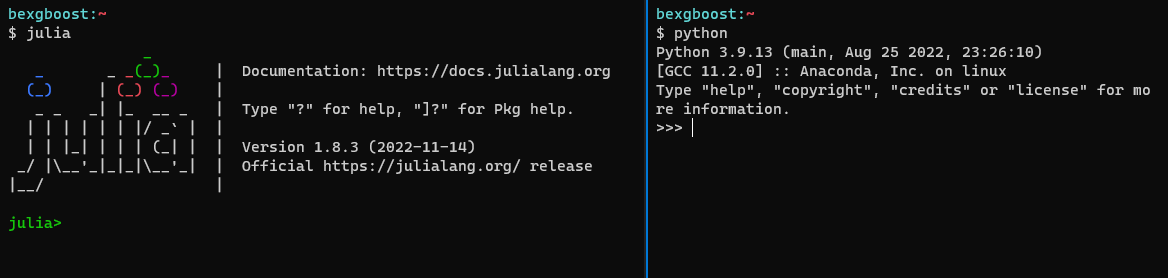

Already on the next level ^

![](images/help_mode.gif)

ANS variable:

![](images/ans_variable.gif)

Shell Mode (tab completion as well)

![](images/shell_mode.gif)

```julia
julia> @time println("Bam!")
Bam!
  0.000114 seconds (7 allocations: 144 bytes)
```

### Bonus features

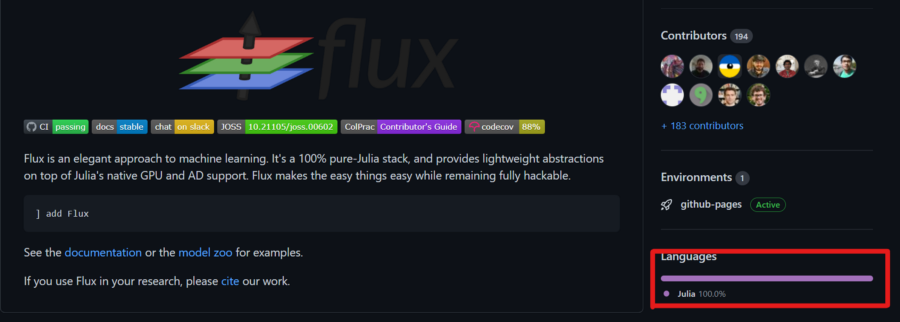

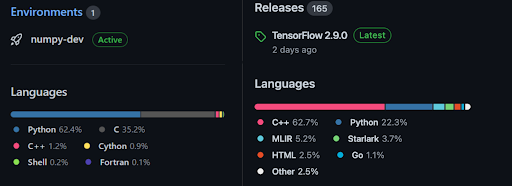

### Conclusion